# Assignment 3
### Due 9/23. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nhanes_df = pd.read_csv("data/nhanes_data_17_18.csv", low_memory=False)
smoking = "DoYouNowSmokeCigarettes"
lose_weight = "TriedToLoseWeightInPastYear"

In [3]:
nhanes_df['smoking_na'] = nhanes_df[smoking].isna()
nhanes_df['smoking_na'].value_counts()

smoking_na
True     6134
False    2232
Name: count, dtype: int64

In [4]:
nhanes_df['weight_na'] = nhanes_df[lose_weight].isna()
nhanes_df['weight_na'].value_counts()

weight_na
False    5087
True     3279
Name: count, dtype: int64

In [5]:
# Count missing values
missing_smoking = nhanes_df[smoking].isnull().sum()
missing_lose_weight = nhanes_df[lose_weight].isnull().sum()
print(f"Missing values for {smoking}: {missing_smoking}")
print(f"Missing values for {lose_weight}: {missing_lose_weight}")

Missing values for DoYouNowSmokeCigarettes: 6134
Missing values for TriedToLoseWeightInPastYear: 3279


In [6]:
# Contingency table
contingency_table = pd.crosstab(nhanes_df[smoking], nhanes_df[lose_weight], dropna=False)
print(contingency_table)

TriedToLoseWeightInPastYear   0.0   1.0   NaN
DoYouNowSmokeCigarettes                      
Every day                     498   171    94
Not at all                    639   437   184
Some days                     122    55    32
NaN                          1805  1360  2969


In the contingency table above, we can see the relationship between smoking status and attempts to lose weight in the past year. The table shows the counts of individuals who smoke and those who do not, along with their corresponding attempts to lose weight. From the table, we can observe that a significant number of individuals who do not smoke have attempted to lose weight, while a smaller proportion of smokers have done the same. This suggests that non-smokers may be more health-conscious or motivated to manage their weight compared to smokers.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [7]:
nhanes_df = pd.read_csv("data/nhanes_data_17_18.csv", low_memory=False)
reported_weight = "CurrentSelfreportedWeightPounds"
education_level = "EducationLevelAdults20"

In [8]:
# Count missing values
missing_reported_weight = nhanes_df[reported_weight].isnull().sum() # Numerical variable
missing_education_level = nhanes_df[education_level].isnull().sum() # Categorical variable
print(f"Missing values for {reported_weight}: {missing_reported_weight}")
print(f"Missing values for {education_level}: {missing_education_level}")

Missing values for CurrentSelfreportedWeightPounds: 2538
Missing values for EducationLevelAdults20: 3103


In [9]:
# Descriptive table
descriptive_table = nhanes_df.groupby(education_level)[reported_weight].describe()
print(descriptive_table)

                                                     count        mean  \
EducationLevelAdults20                                                   
9-11th grade (Includes 12th grade with no diploma)   598.0  518.093645   
College graduate or above                           1261.0  217.566217   
Don't Know                                            10.0  165.700000   
High school graduate/GED or equivalent              1251.0  323.378098   
Less than 9th grade                                  454.0  798.713656   
Some college or AA degree                           1689.0  282.761989   

                                                            std    min    25%  \
EducationLevelAdults20                                                          
9-11th grade (Includes 12th grade with no diploma)  1792.771465   89.0  145.0   
College graduate or above                            631.167658   93.0  141.0   
Don't Know                                            34.663622  110.0  137.5   
Hi

/var/folders/sb/jbh1d71j5c9clmnb_rnsjqb00000gn/T/ipykernel_23134/277345862.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Education Level', loc=education_level)


ValueError: 'EducationLevelAdults20' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

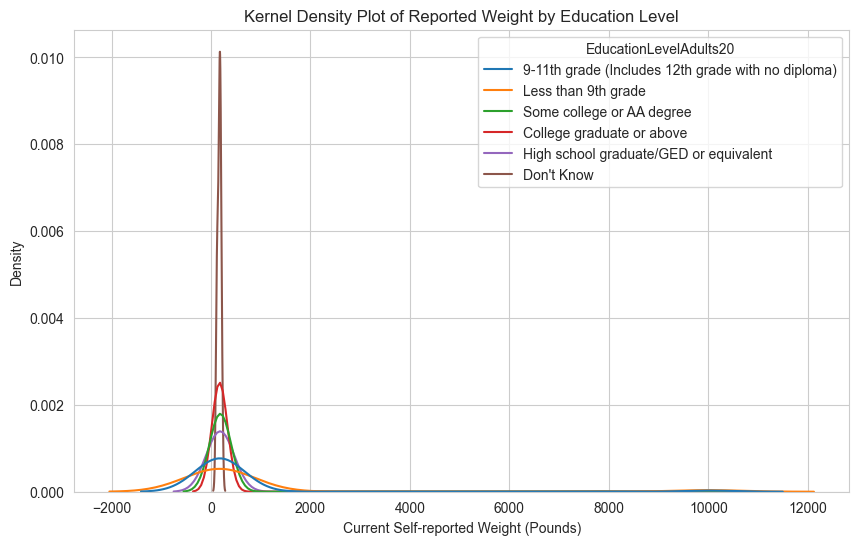

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=nhanes_df, x=reported_weight, hue=education_level, common_norm=False)
plt.title('Kernel Density Plot of Reported Weight by Education Level')
plt.xlabel('Current Self-reported Weight (Pounds)')
plt.ylabel('Density')
plt.legend(title='Education Level', loc=education_level)
plt.show()

In the data analysis above, we examined the relationship between education level (categorical variable) and current self-reported weight in pounds (numeric variable). The descriptive statistics table provides insights into the distribution of weights across different education levels. We can observe that individuals with higher education levels tend to have a slightly lower mean weight compared to those with lower education levels. The kernel density plot further illustrates this relationship, showing distinct distributions of weight for each education level.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

The LCLS/Nadaraya-Watson estimator is a non-parametric method used to estimate the conditional expectation of a random variable. It is particularly useful when we want to predict the value of a dependent variable $Y$ given a specific value of an independent variable $X=z$. The estimator is defined as:

$$\hat{y}(z) = \frac{\sum_{i=1}^N y_i k\left(\frac{z-x_i}{h}\right)}{\sum_{i=1}^N k\left(\frac{z-x_i}{h}\right)}$$

where:
- $k(\cdot)$ is the kernel function
- $h$ is the bandwidth parameter
- $z$ is the prediction point
- $(x_i, y_i)$ are the observed data points

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [21]:
class NadarayaWatson:
    def __init__(self, bandwidth=None):
        self.bandwidth = bandwidth

    def silverman_bandwidth(self, x):
        n = len(x)
        std_dev = x.std()
        return 1.06 * std_dev * n ** (-1 / 5)

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        if self.bandwidth is None:
            self.bandwidth = self.silverman_bandwidth(X)

    def predict(self, z):
        weights = (1 / self.bandwidth) * self.kernel((z - self.X) / self.bandwidth)
        return (weights * self.Y).sum() / weights.sum()

    @staticmethod
    def kernel(u):
        return (1 / (2 * 3.14159) ** 0.5) * np.exp(-0.5 * u ** 2)

In [22]:
ames_iowa_df = pd.read_csv("data/ames_prices.csv", low_memory=False)
bsmt_fin = "BsmtFin.SF.1"
pool_area = "Pool.Area"

ames_iowa_df = ames_iowa_df[[bsmt_fin, pool_area]].dropna()

nw_estimator = NadarayaWatson()
nw_estimator.fit(ames_iowa_df[bsmt_fin], ames_iowa_df[pool_area])
predictions = ames_iowa_df[bsmt_fin].apply(nw_estimator.predict)

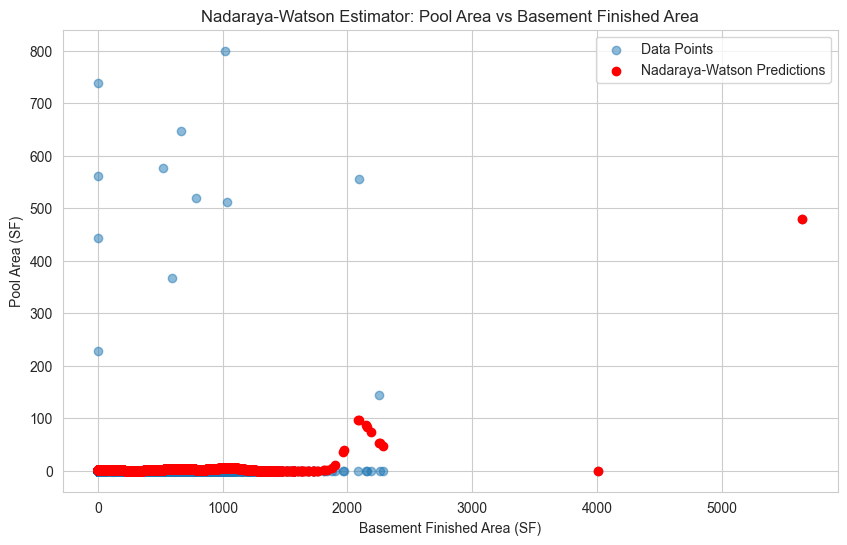

In [29]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(ames_iowa_df[bsmt_fin], ames_iowa_df[pool_area], alpha=0.5, label='Data Points')
plt.scatter(ames_iowa_df[bsmt_fin], predictions, color='red',)
plt.title('Nadaraya-Watson Estimator: Pool Area vs Basement Finished Area')
plt.xlabel('Basement Finished Area (SF)')
plt.ylabel('Pool Area (SF)')
plt.legend(['Data Points', 'Nadaraya-Watson Predictions'])
plt.show()

For the analysis above, we used the Ames housing dataset to explore the relationship between basement finished area (BsmtFin.SF.1) and pool area (Pool.Area) using the Nadaraya-Watson estimator. The scatter plot shows the original data points along with the predictions made by the Nadaraya-Watson estimator. The red points represent the estimated pool area based on the basement finished area. We can observe that there is a non-linear relationship between these two variables, which is effectively captured by the Nadaraya-Watson estimator. This suggests that as the basement finished area increases, there is a tendency for the pool area to also increase, although the relationship is not strictly linear. The Nadaraya-Watson estimator provides a smooth estimate of this relationship, allowing us to see trends that may not be immediately apparent from the raw data alone. Also there appears to not be many houses that have a pool, so the relationship maybe better analyzed if we remove houses without pools.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

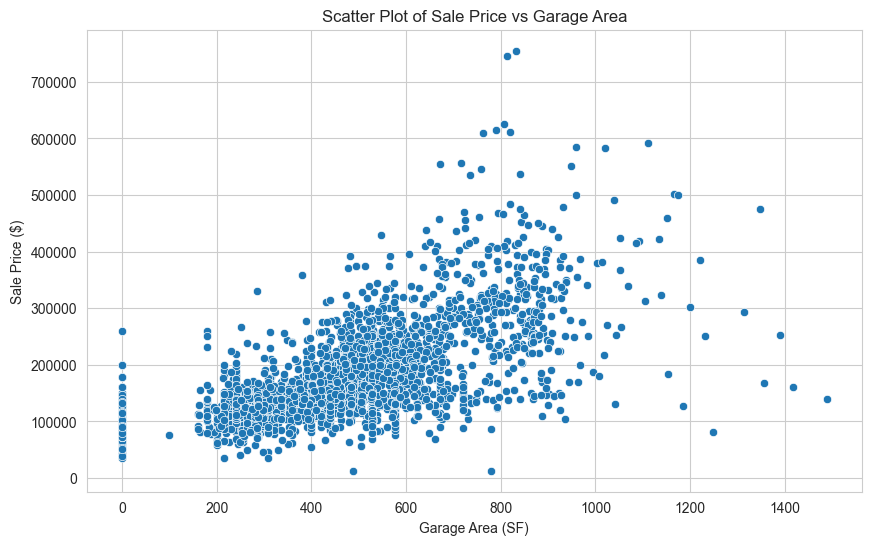

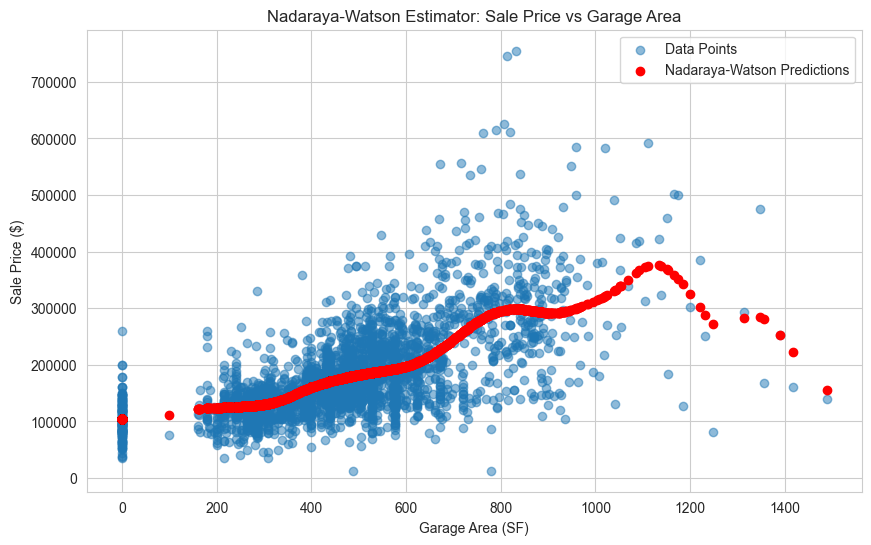

In [36]:
ames_iowa_df = pd.read_csv("data/ames_prices.csv", low_memory=False)

garage_area = "Garage.Area"
sale_price = "price"
ames_iowa_df = ames_iowa_df[[garage_area, sale_price]].dropna()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ames_iowa_df, x=garage_area, y=sale_price)
plt.title('Scatter Plot of Sale Price vs Garage Area')
plt.xlabel('Garage Area (SF)')
plt.ylabel('Sale Price ($)')
plt.show()

# CEF using Nadaraya-Watson estimator
nw_estimator = NadarayaWatson()
nw_estimator.fit(ames_iowa_df[garage_area], ames_iowa_df[sale_price])
predictions = ames_iowa_df[garage_area].apply(nw_estimator.predict)
# Plotting the CEF
plt.figure(figsize=(10, 6))
plt.scatter(ames_iowa_df[garage_area], ames_iowa_df[sale_price], alpha=0.5, label='Data Points')
plt.scatter(ames_iowa_df[garage_area], predictions, color='red', label='Nadaraya-Watson Predictions')
plt.title('Nadaraya-Watson Estimator: Sale Price vs Garage Area')
plt.xlabel('Garage Area (SF)')
plt.ylabel('Sale Price ($)')
plt.legend()
plt.show()

The relationship between garage area and sale price is likely influenced by several confounding variables that could threaten causal identification. For instance, the overall size of the house, location, number of bedrooms and bathrooms, and neighborhood quality are all factors that can significantly impact the sale price of a property. Additionally, market conditions and economic factors at the time of sale can also play a role. Therefore, while there is a positive correlation between garage area and sale price, it is not sufficient to claim a direct causal relationship without accounting for these other variables. The spring is a well known time for home buying, so seasonality may also be a factor. But our limited data set does not have a date variable for all the possible causes.

Even with the presence of confounding variables, we can still use the Nadaraya-Watson estimator to predict sale price based on garage area as long as we are not intervening in the system. The model captures the conditional expectation of sale price given garage area, which allows us to make predictions based on observed data. However, it is important to note that these predictions are valid only within the context of the existing relationships in the data. If we were to intervene and change the garage area (e.g., by adding a garage), the predicted sale price might not hold true because the underlying relationships could change due to other factors not accounted for in the model. Therefore, while we can use the model for prediction, we must be cautious about interpreting these predictions as causal effects.